In [ ]:
import pandas as pd

#File path
file_path = r'C:\Users\matth\Downloads\GSE33341-GPL1261_series_matrix.txt.gz'

# Load the dataset
df = pd.read_csv(file_path, sep="\t", comment='!', compression='gzip')

# Inspect the dataset
print(df.head())
print(f"Dataset shape: {df.shape}")



         ID_REF  GSM824455  GSM824456  GSM824457  GSM824458  GSM824459  \
0    1415670_at    7.50888    7.80466    7.61746    7.64594    7.13346   
1    1415671_at   10.14350   10.25590   10.10840   10.06280   10.25300   
2    1415672_at   10.63550   10.87430   10.88910   10.31740   10.35160   
3    1415673_at    6.74181    7.23415    6.98057    6.27851    6.46165   
4  1415674_a_at    7.43168    7.88322    7.79419    7.51749    7.60085   

   GSM824460  GSM824461  GSM824462  GSM824463  ...  GSM824672  GSM824673  \
0    7.53121    7.20897    6.88420    6.98592  ...    7.47428    7.29266   
1   10.25500   10.50230   10.42320   10.29810  ...   10.39290   10.43620   
2   10.60330   11.32020   11.24410   11.02410  ...   11.10120   10.77720   
3    6.36037    6.95382    6.55259    6.60007  ...    7.33818    7.33354   
4    7.51904    7.94250    7.88107    7.71720  ...    8.53814    8.44032   

   GSM824674  GSM824675  GSM824676  GSM824677  GSM824678  GSM824679  \
0    7.44179    7.65935    

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Transpose the dataset
data = df.set_index("ID_REF").T

# Filter low-variance genes
selector = VarianceThreshold(threshold=0.1)  # Remove genes with variance < 0.1
filtered_data = selector.fit_transform(data)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(filtered_data)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Reduce to 50 principal components
pca_data = pca.fit_transform(normalized_data)

# Check shape
filtered_data.shape, pca_data.shape

((227, 18172), (227, 50))

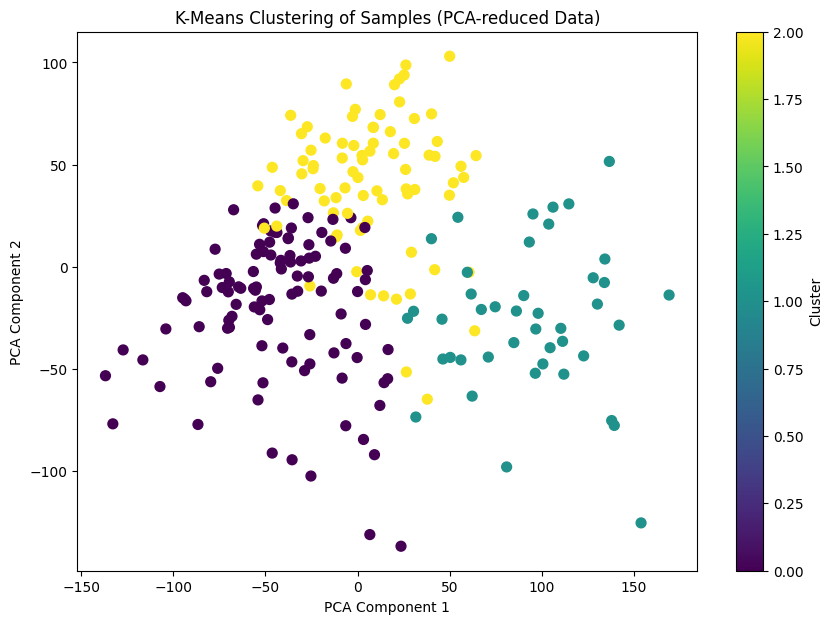

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assume 3 clusters for demonstration
clusters = kmeans.fit_predict(pca_data)

# Visualize clusters using the first two PCA components
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("K-Means Clustering of Samples (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [9]:
# Map clusters back to the original (normalized) data
cluster_df = pd.DataFrame(normalized_data, columns=data.columns[selector.get_support()])
cluster_df['Cluster'] = clusters

# Calculate mean expression of each gene by cluster
gene_means_by_cluster = cluster_df.groupby('Cluster').mean()

# Display the first few rows
gene_means_by_cluster.head()

ID_REF,1415670_at,1415673_at,1415676_a_at,1415677_at,1415680_at,1415681_at,1415682_at,1415683_at,1415684_at,1415685_at,...,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TransRecMur/X57349_5_at,AFFX-TransRecMur/X57349_M_at
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.600934,-0.400344,-0.693792,-0.309829,-0.670821,-0.654930,0.275855,-0.617265,-0.511435,-0.540200,...,0.334059,0.216694,0.278502,0.150029,0.118297,0.434567,-0.017673,0.208707,0.338125,0.368272
1,1.465494,0.112135,1.184501,0.518666,0.761925,0.803963,-1.197454,1.269505,0.435537,0.596383,...,-0.883123,-0.586246,-0.635259,-0.288271,-0.217606,-0.358798,0.161882,-0.055442,-0.580594,-0.774224
2,0.001036,0.471067,0.277400,0.129486,0.476879,0.432876,0.285136,0.129419,0.442692,0.393374,...,0.036685,0.031085,-0.024387,-0.042498,-0.038786,-0.382294,-0.064623,-0.247218,-0.133387,-0.068063


In [10]:
# Calculate variance of each gene across clusters
gene_variances = gene_means_by_cluster.var(axis=0)

# Identify the top 10 genes with the highest variance
top_genes = gene_variances.sort_values(ascending=False).head(10)
print("Top 10 genes with highest variance across clusters:")
print(top_genes)


Top 10 genes with highest variance across clusters:
ID_REF
1423289_a_at    1.697368
1419413_at      1.554145
1424500_at      1.536468
1450488_at      1.519555
1448633_at      1.497733
1416312_at      1.493567
1421260_a_at    1.472312
1451470_s_at    1.457714
1460227_at      1.454471
1450446_a_at    1.452800
dtype: float64


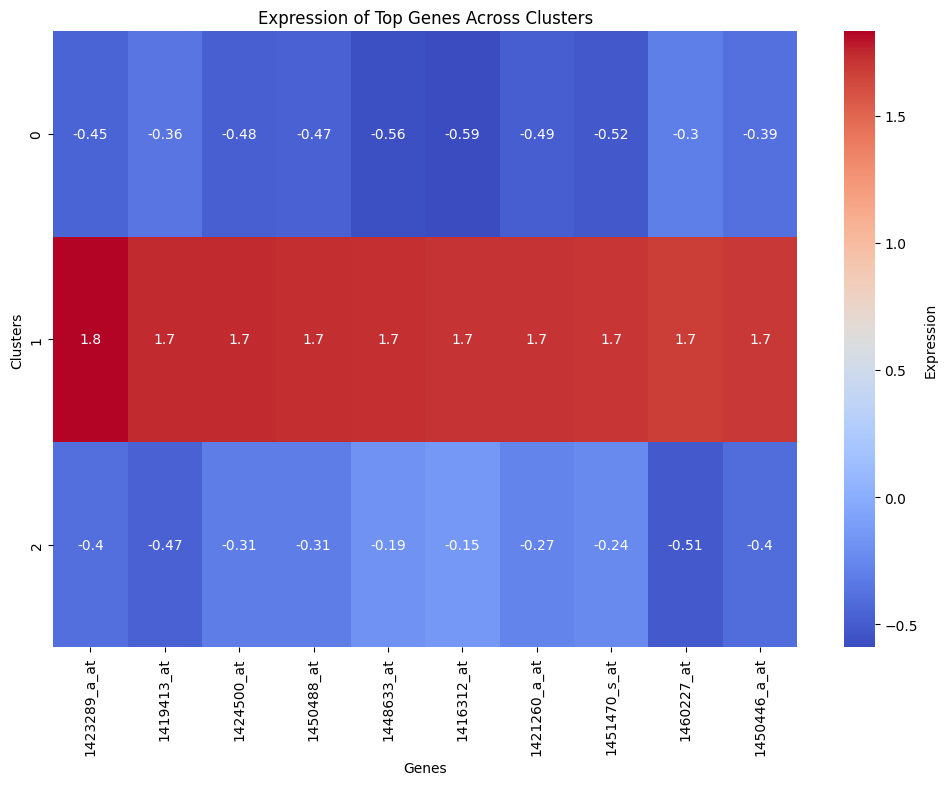

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract data for top genes
top_gene_names = top_genes.index
heatmap_data = gene_means_by_cluster[top_gene_names]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar_kws={'label': 'Expression'})
plt.title("Expression of Top Genes Across Clusters")
plt.xlabel("Genes")
plt.ylabel("Clusters")
plt.show()


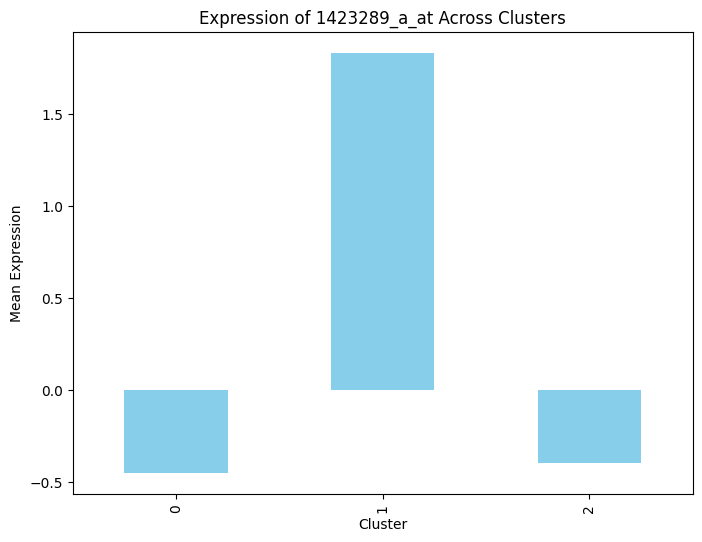

In [14]:
# Choose a gene to visualize
gene_to_plot = top_gene_names[0]  # Top gene

# Plot mean expression across clusters
plt.figure(figsize=(8, 6))
gene_means_by_cluster[gene_to_plot].plot(kind='bar', color='skyblue')
plt.title(f"Expression of {gene_to_plot} Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Mean Expression")
plt.show()
